# 📈 Stock Regression Predictor

**Author:** Deep Joshi

**Created On:** May 10, 2025

**Project Type:** Machine Learning / Data Science / Linear Regression

**Environment:** Jupyter Notebook (Python 3.13)

---

## 📝 Project Description

This project is designed to predict stock prices using regression models. It involves:

- Importing and processing historical stock market data
- Visualizing trends and relationships between variables
- Applying linear regression and other machine learning models to forecast stock prices
- Evaluating model performance using error metrics

The purpose of this notebook is to provide a clear, modular, and reproducible workflow for experimenting with stock prediction using supervised learning techniques.

---

## 🔧 Technologies Used

- Python 3.x
- NumPy, Pandas
- Matplotlib
- Scikit-learn
- YFinance
- Jupyter Notebook

---

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [2]:
#Fetching from yFinance
def fetch_stock_data(ticker, start="2024-01-01"):
    stock = yf.Ticker(ticker)
    df = stock.history(start=start)
    df.reset_index(inplace=True)
    #Returning DataFrame    
    
    return df

In [3]:
def preprocess_data(df):
    #Splitting the date into 3 parts
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    
    #Adding their Sin and Cosine Factors for their seasonal factors    
    df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
    df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
    df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)
    df['Day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)
    
    #The Stock has Dependent Variables of the Date in our Model
    features = [ 'Year', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos']
    X = df[features]
    
    #For predicting we'll use Closing Value as Independent Variable
    #type = High, Low, Close
    y_high = df['High']
    y_low = df['Low']
    y_close = df['Close']

    return X, y_high, y_low, y_close

In [4]:
def train_and_evaluate_model(X, y):
    #Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #Model Fitting
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    #Predicting
    y_pred = model.predict(X_test_scaled)
    
    #Metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    #Printing Metrics
    print(f"Model Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
    
    #Returning Model
    return model, scaler

In [5]:
def predict_future_prices(model, scaler, last_date, choice, n_days=20):
    #The Future Date is to be processed to fit in Dependent Variables
    future_dates = pd.date_range(start=last_date, periods=n_days + 1)[1:]
    future_df = pd.DataFrame({
        'Year': future_dates.year,
        'Month_sin': np.sin(2 * np.pi * future_dates.month / 12),
        'Month_cos': np.cos(2 * np.pi * future_dates.month / 12),
        'Day_sin': np.sin(2 * np.pi * future_dates.day / 31),
        'Day_cos': np.cos(2 * np.pi * future_dates.day / 31)
    })
    
    future_scaled = scaler.transform(future_df)
    future_predictions = model.predict(future_scaled)
    
    prediction_df = pd.DataFrame({'Date': future_dates, f'Predicted_{choice}': future_predictions})
    
    return prediction_df

In [6]:
#Requesting Ticker and Number of Days
# ticker = input("Enter stock ticker:").upper()
# n_days = int(input("Enter number of days to predict: "))
ticker = "MSFT"
n_days = 180
#Calling Functions
df = fetch_stock_data(ticker)
X, y_high, y_low, y_close = preprocess_data(df)

#High
print("\nHigh")
model, scaler = train_and_evaluate_model(X, y_high)
future_high = predict_future_prices(model, scaler, df['Date'].iloc[-1], "High", n_days)

#Low
print("\nLow")
model, scaler = train_and_evaluate_model(X, y_low)
future_low = predict_future_prices(model, scaler, df['Date'].iloc[-1], "Low", n_days)


#Close
print("\nClose")
model, scaler = train_and_evaluate_model(X, y_close)
future_close = predict_future_prices(model, scaler, df['Date'].iloc[-1], "Close", n_days)


High
Model Performance:
R² Score: 0.0018
Mean Absolute Error (MAE): 14.3351
Mean Squared Error (MSE): 323.5859
Root Mean Squared Error (RMSE): 17.9885
Mean Absolute Percentage Error (MAPE): 0.0337

Low
Model Performance:
R² Score: 0.1984
Mean Absolute Error (MAE): 16.8975
Mean Squared Error (MSE): 436.7872
Root Mean Squared Error (RMSE): 20.8995
Mean Absolute Percentage Error (MAPE): 0.0420

Close
Model Performance:
R² Score: 0.1839
Mean Absolute Error (MAE): 16.7064
Mean Squared Error (MSE): 452.6332
Root Mean Squared Error (RMSE): 21.2752
Mean Absolute Percentage Error (MAPE): 0.0410


In [7]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,Month_sin,Month_cos,Day_sin,Day_cos
count,343.000000,343.000000,343.000000,343.000000,3.430000e+02,343.000000,343.0,343.000000,343.000000,343.000000,343.000000,3.430000e+02,343.000000,343.000000
mean,414.128951,417.739649,410.300169,414.235234,2.154885e+07,0.011399,0.0,2024.265306,5.539359,15.507289,0.199834,1.913171e-02,0.029632,-0.021613
std,20.762647,20.255041,21.057270,20.707749,8.007216e+06,0.093982,0.0,0.442141,3.446847,8.776252,0.707733,6.794271e-01,0.719352,0.695779
min,350.880005,364.480011,344.790009,354.559998,7.164500e+06,0.000000,0.0,2024.000000,1.000000,1.000000,-1.000000,-1.000000e+00,-0.998717,-0.994869
25%,402.641193,406.076367,399.259442,401.754120,1.661770e+07,0.000000,0.0,2024.000000,3.000000,8.000000,-0.500000,-5.000000e-01,-0.724793,-0.758758
50%,415.314274,418.073211,410.699563,414.656891,1.963780e+07,0.000000,0.0,2024.000000,5.000000,15.000000,0.500000,6.123234e-17,0.101168,-0.050649
75%,426.536322,429.847987,423.092430,426.428848,2.353560e+07,0.000000,0.0,2025.000000,8.000000,23.000000,0.866025,5.000000e-01,0.724793,0.688967
max,464.297590,465.639777,461.772294,464.854340,6.426370e+07,0.830000,0.0,2025.000000,12.000000,31.000000,1.000000,1.000000e+00,0.998717,1.000000


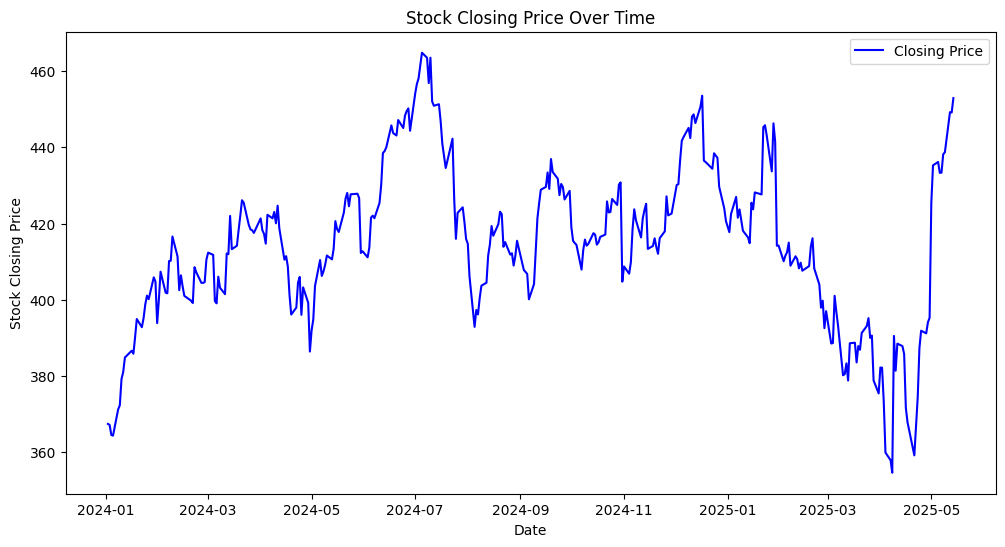

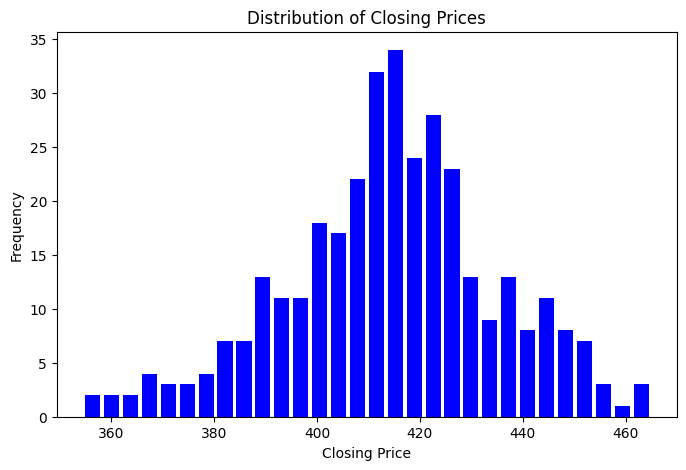

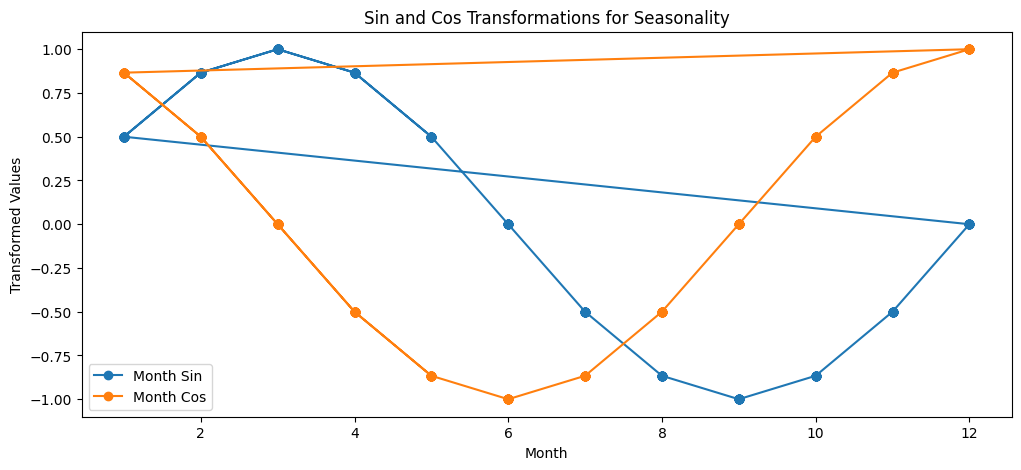

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label="Closing Price", color='b')
plt.xlabel("Date")
plt.ylabel("Stock Closing Price")
plt.title("Stock Closing Price Over Time")
plt.legend()
plt.savefig(r"../graphs/stock_closing_price_timeline.png")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(df['Close'], bins=30, color='blue', rwidth= 0.8)
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.savefig(r"../graphs/stock_closing_price_distribution.png")
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df['Month'], df['Month_sin'], label='Month Sin', marker='o')
plt.plot(df['Month'], df['Month_cos'], label='Month Cos', marker='o')
plt.xlabel("Month")
plt.ylabel("Transformed Values")
plt.title("Sin and Cos Transformations for Seasonality")
plt.legend()
plt.savefig(r"../graphs/sin_cos_transformation.png")
plt.show()

In [12]:
last_actual_high = pd.DataFrame({
    'Date': [df['Date'].iloc[-1]],
    'Predicted_High': [df['High'].iloc[-1]]
})

connected_high = pd.concat([last_actual_high, future_high], ignore_index=True)

last_actual_low = pd.DataFrame({
    'Date': [df['Date'].iloc[-1]],
    'Predicted_Low': [df['Low'].iloc[-1]]
})

connected_low = pd.concat([last_actual_low, future_low], ignore_index=True)

last_actual_close = pd.DataFrame({
    'Date': [df['Date'].iloc[-1]],
    'Predicted_Close': [df['Close'].iloc[-1]]
})

connected_close = pd.concat([last_actual_close, future_close], ignore_index=True)


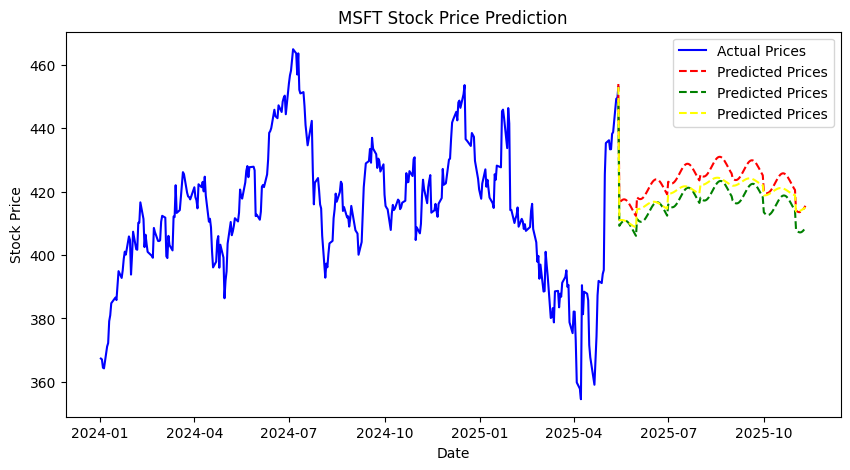

In [13]:
#Plotting Prediction
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label="Actual Prices", color='blue')
plt.plot(connected_high['Date'], connected_high['Predicted_High'], label="Predicted Prices", color='red', linestyle="dashed")
plt.plot(connected_low['Date'], connected_low['Predicted_Low'], label="Predicted Prices", color='green', linestyle="dashed")
plt.plot(connected_close['Date'], connected_close['Predicted_Close'], label="Predicted Prices", color='yellow', linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.title(f"{ticker} Stock Price Prediction")
plt.savefig(r"../graphs/stock_prediction.png")
plt.show()